In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense

In [114]:
df=pd.read_csv(r"C:\Users\rocky\Desktop\retail_sales.csv")

In [115]:
df

,Date,Sales
0,1/1/15 0:00,54.048619
1,1/1/15 1:00,50.161596
2,1/1/15 2:00,55.954939
3,1/1/15 3:00,56.553261
4,1/1/15 4:00,60.487874
...,...,...
52580,30/12/20 20:00,140.946779
52581,30/12/20 21:00,145.561324
52582,30/12/20 22:00,144.484071
52583,30/12/20 23:00,147.890291


In [117]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df['Sales'] = df['Sales'].interpolate()
scaler = MinMaxScaler(feature_range=(0, 1))
df['Sales'] = scaler.fit_transform(df[['Sales']])

C:\Users\rocky\AppData\Local\Temp\ipykernel_8360\983940289.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [118]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [119]:
seq_length = 12
sales_data = df['Sales'].values
X_rnn, y_rnn = create_sequences(sales_data, seq_length)
X_lstm, y_lstm = create_sequences(sales_data, seq_length)
X_gru, y_gru = create_sequences(sales_data, seq_length)

In [120]:
split = int(len(X_rnn) * 0.8)
X_train_rnn, X_test_rnn = X_rnn[:split], X_rnn[split:]
y_train_rnn, y_test_rnn = y_rnn[:split], y_rnn[split:]

In [121]:
rnn_model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])
rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.fit(X_train_rnn, y_train_rnn, epochs=50, batch_size=32, verbose=1)

Epoch 1/50


C:\Users\rocky\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1315/1315 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0113
Epoch 2/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4.4392e-04
Epoch 3/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4.3198e-04
Epoch 4/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4.1839e-04
Epoch 5/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4.1325e-04
Epoch 6/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4.0773e-04
Epoch 7/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 3.9388e-04
Epoch 8/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 3.9767e-04
Epoch 9/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4.1323e-04
Epoch 10/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 3.9665e-04
Epoch 11/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4.0163e-04
Epoch 12/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 3.8981e-04
Epoch 13/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 3.8998e-04
Epoch 14/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss:

In [122]:
train_predict_rnn = rnn_model.predict(X_train_rnn)
test_predict_rnn = rnn_model.predict(X_test_rnn)

1315/1315 ━━━━━━━━━━━━━━━━━━━━ 1s 943us/step
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step


In [123]:
split = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:split], X_lstm[split:]
y_train_lstm, y_test_lstm = y_lstm[:split], y_lstm[split:]

In [124]:
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0122
Epoch 2/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 5.1973e-04
Epoch 3/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.7709e-04
Epoch 4/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.6191e-04
Epoch 5/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.4920e-04
Epoch 6/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 4.4580e-04
Epoch 7/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 4.4079e-04
Epoch 8/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 4.3424e-04
Epoch 9/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.3804e-04
Epoch 10/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 4.1865e-04
Epoch 11/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 4.1568e-04
Epoch 12/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.0636e-04
Epoch 13/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3.9827e-04
Epoch 14/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/s

In [125]:
train_predict_lstm = lstm_model.predict(X_train_lstm)
test_predict_lstm = lstm_model.predict(X_test_lstm)

1315/1315 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [126]:
split = int(len(X_gru) * 0.8)
X_train_gru, X_test_gru = X_gru[:split], X_gru[split:]
y_train_gru, y_test_gru = y_gru[:split], y_gru[split:]

In [127]:
gru_model = Sequential([
    GRU(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])
gru_model.compile(optimizer='adam', loss='mse')
gru_model.fit(X_train_gru, y_train_gru, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0065
Epoch 2/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 5.0117e-04
Epoch 3/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.6703e-04
Epoch 4/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.5323e-04
Epoch 5/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.5631e-04
Epoch 6/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.5417e-04
Epoch 7/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.4614e-04
Epoch 8/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.4521e-04
Epoch 9/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.5166e-04
Epoch 10/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.3273e-04
Epoch 11/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.3620e-04
Epoch 12/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.3009e-04
Epoch 13/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.3283e-04
Epoch 14/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/s

In [128]:
train_predict_gru = gru_model.predict(X_train_gru)
test_predict_gru = gru_model.predict(X_test_gru)

1315/1315 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [129]:
def inverse_transform_and_evaluate(y_train, train_predict, y_test, test_predict, scaler):
    train_predict = scaler.inverse_transform(train_predict)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predict = scaler.inverse_transform(test_predict)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
    train_mae = mean_absolute_error(y_train, train_predict)
    test_mae = mean_absolute_error(y_test, test_predict)
    train_r2 = r2_score(y_train, train_predict)
    test_r2 = r2_score(y_test, test_predict)

    return train_rmse, test_rmse, train_mae, test_mae, train_r2, test_r2

rnn_results = inverse_transform_and_evaluate(y_train_rnn, train_predict_rnn, y_test_rnn, test_predict_rnn, scaler)
lstm_results = inverse_transform_and_evaluate(y_train_lstm, train_predict_lstm, y_test_lstm, test_predict_lstm, scaler)
gru_results = inverse_transform_and_evaluate(y_train_gru, train_predict_gru, y_test_gru, test_predict_gru, scaler)


In [130]:
print("RNN Results:")
print(f'Train RMSE: {rnn_results[0]}, Test RMSE: {rnn_results[1]}')
print(f'Train MAE: {rnn_results[2]}, Test MAE: {rnn_results[3]}')
print(f'Train R²: {rnn_results[4]}, Test R²: {rnn_results[5]}')
print("\nLSTM Results:")
print(f'Train RMSE: {lstm_results[0]}, Test RMSE: {lstm_results[1]}')
print(f'Train MAE: {lstm_results[2]}, Test MAE: {lstm_results[3]}')
print(f'Train R²: {lstm_results[4]}, Test R²: {lstm_results[5]}')
print("\nGRU Results:")
print(f'Train RMSE: {gru_results[0]}, Test RMSE: {gru_results[1]}')
print(f'Train MAE: {gru_results[2]}, Test MAE: {gru_results[3]}')
print(f'Train R²: {gru_results[4]}, Test R²: {gru_results[5]}')

RNN Results:
Train RMSE: 2.5822637274096905, Test RMSE: 2.66879269689017
Train MAE: 2.0512421565500536, Test MAE: 2.121566387250171
Train R²: 0.9888437980604556, Test R²: 0.9273731129443457

LSTM Results:
Train RMSE: 2.502879049443995, Test RMSE: 2.562566863617428
Train MAE: 1.989125180114333, Test MAE: 2.031728370832135
Train R²: 0.9895191886665344, Test R²: 0.9330395812783232

GRU Results:
Train RMSE: 2.522071612657283, Test RMSE: 2.642742162614998
Train MAE: 2.0061718341658343, Test MAE: 2.1110869535033654
Train R²: 0.9893578345837807, Test R²: 0.9287840395389333


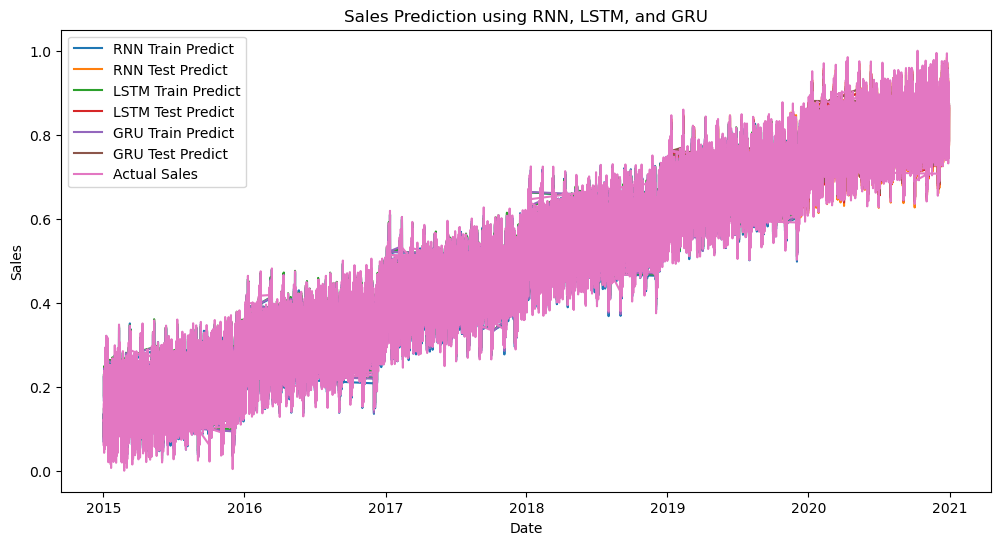

In [134]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[seq_length:seq_length+len(train_predict_rnn)], train_predict_rnn, label='RNN Train Predict')
plt.plot(df.index[seq_length+len(train_predict_rnn):], test_predict_rnn, label='RNN Test Predict')
plt.plot(df.index[seq_length:seq_length+len(train_predict_lstm)], train_predict_lstm, label='LSTM Train Predict')
plt.plot(df.index[seq_length+len(train_predict_lstm):], test_predict_lstm, label='LSTM Test Predict')
plt.plot(df.index[seq_length:seq_length+len(train_predict_gru)], train_predict_gru, label='GRU Train Predict')
plt.plot(df.index[seq_length+len(train_predict_gru):], test_predict_gru, label='GRU Test Predict')
plt.plot(df.index[seq_length:], df['Sales'][seq_length:], label='Actual Sales')
plt.title('Sales Prediction using RNN, LSTM, and GRU')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [1]:
model.save()

NameError: name 'model' is not defined